In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend

def heat(t_surf,
         tmax = 1000,
         tmin = 0,
         zmax = 100,
         dTdz = 0.02,
         nz = 39,
         nt = 99,
         alpha = 30):
    
    '''
    Solves the heat equation with mixed temperature/heat flux boundary conditions
    '''
    
    z0=0    
    dz = zmax/(nz+1)
    dt = tmax/nt
    t = np.linspace(tmin,tmax, nt+1)
    z = np.linspace(dz,zmax, nz+1)

    cfl = alpha*dt/(dz**2)
    A = np.diag([1+2*cfl] * (nz+1)) + np.diag([-cfl] * (nz),k=1)\
        + np.diag([-cfl] * (nz),k=-1)

    # Neumann boundary condition
    A[nz,nz-1] = -2*cfl
    b= np.zeros((nz+1,1))
    b[nz] =  2*cfl*dz * dTdz

    # Initial condition: gradient equal to basal gradient and equal to surface temp.
    U=np.zeros((nz+1,nt+1))
    U[:,0] = t_surf[0] + z*dTdz

    for k in range(nt):
        b[0] = cfl*t_surf[k]    #  Dirichlet boundary condition

        c = U[:,k] + b.flatten()
        U[:,k+1] = np.linalg.solve(A,c)

    return U,t,z

In [2]:
def history(nt,steps):
    '''
    Make a stair-stepped array like this:
              ______      _____ 
    _____-----      ------
    
    Based only on the step heights and total length
    '''
    if np.mod(nt,len(steps)) > 0:
        print(np.mod(nt,len(steps)))
        return np.nan
    
    out = np.zeros((nt,1))
    step_size = int(nt/len(steps))
    for i in range(len(steps)):
        out[i*step_size : (i+1)*step_size] = steps[i]
    return out

In [3]:
def make_plot(t,t_surf,start_year,end_year,z,U,plot_start_frac=0.95):
    nt=len(t)
    plt.subplots(2,2,figsize=(16,9))
    plt.subplot(221)
    plt.plot(t,t_surf)
    plt.xlim([start_year,end_year])
    plt.grid()

    plt.subplot(222)
    plt.plot(t,t_surf)
    plt.xlim([2020,end_year])
    plt.ylim([min(t_surf[t>2020])*1.001,max(t_surf[t>2020])*0.999])
    plt.grid()

    plt.subplot(223)
    c=plt.pcolormesh(t,z,U)
    # plt.colorbar(c)
    plt.ylim([max_depth,0])
    plt.xlabel('Calendar year')

    plt.subplot(224)
    strt = int((nt+1)*plot_start_frac)
    for i in range( strt,nt):
        plt.plot(detrend(U[:,i]),z,label=f't={t[i]:.2f}')
    # plt.plot(detrend(U[:,-3]),z,'-k',linewidth=3,label=f't={t[-3]:.2f}')
    plt.ylim([max_depth,0])
    plt.legend()
    plt.show()

# A simulation with recent sudden cooling superposed on a long term warming trend qualitatively matches the observations.

2021.643216080402


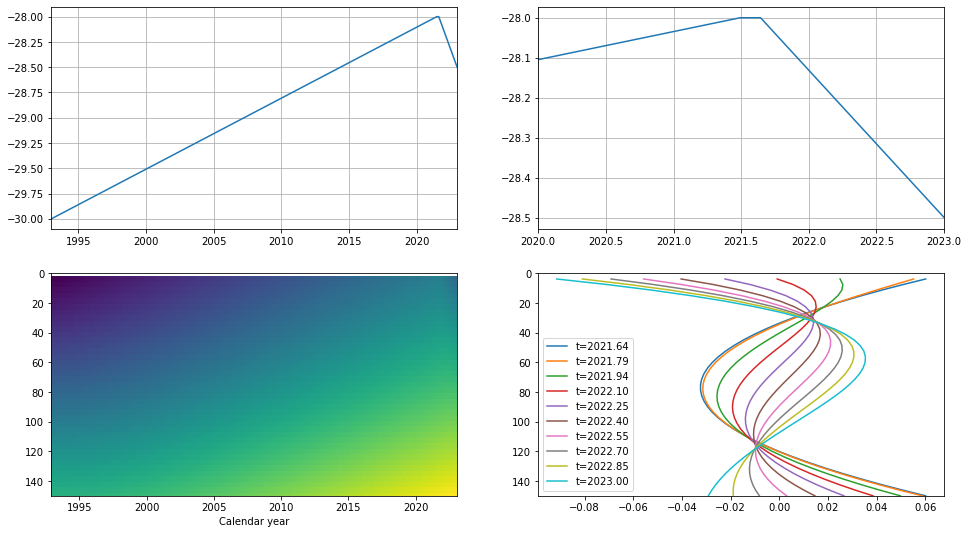

In [4]:
start_year = 1993
end_year = 2023
number_of_time_steps = 199
max_depth = 150

t = np.linspace(start_year,end_year, number_of_time_steps+1)

t_surf=history(number_of_time_steps+1,
               np.hstack( (
                   -30*np.ones(190) +2*np.linspace(0,1,190),
                   -28*np.ones(10) -0.5*np.linspace(0,1,10)
               ) 
               )
              )
print(t[95*2])
U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,nt=number_of_time_steps,zmax=max_depth)

make_plot(t,t_surf,start_year,end_year,z,U)

# How small can the background warming trend be?

2021.643216080402


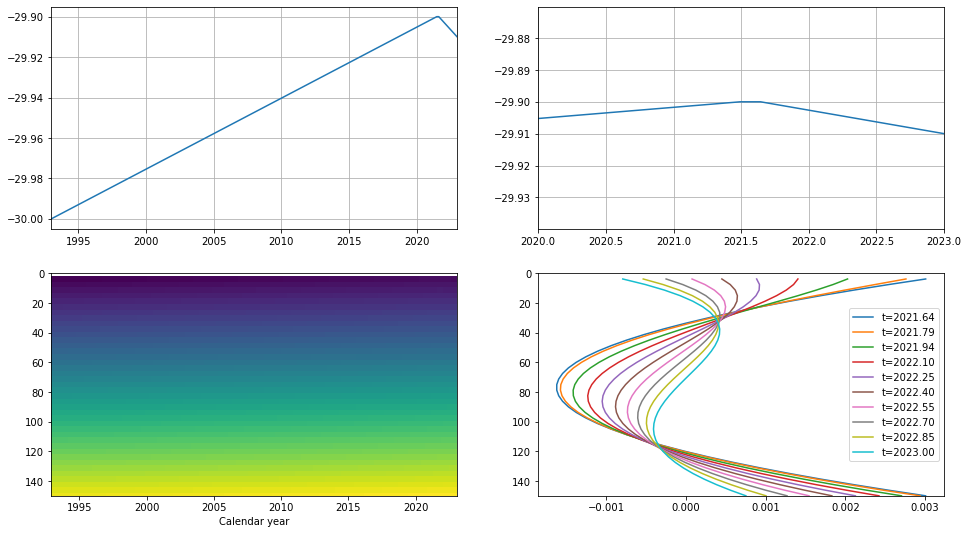

In [5]:

start_year = 1993
end_year = 2023
number_of_time_steps = 199
max_depth = 150

t = np.linspace(start_year,end_year, number_of_time_steps+1)

t_surf=history(number_of_time_steps+1,
               np.hstack( (
                   -30*np.ones(190) +0.1*np.linspace(0,1,190),
                   -29.9*np.ones(10) -0.01*np.linspace(0,1,10)
               ) 
               )
              )
print(t[95*2])
U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,nt=number_of_time_steps,zmax=max_depth)

make_plot(t,t_surf,start_year,end_year,z,U)

# How long as the warming trend been going on?

2022.9547738693468


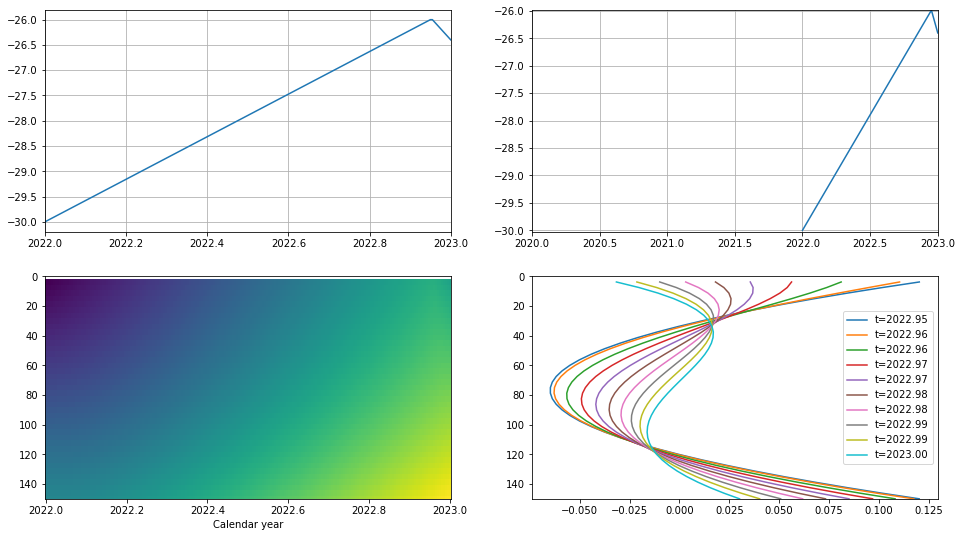

In [6]:

start_year = 2022
end_year = 2023
number_of_time_steps = 199
max_depth = 150

t = np.linspace(start_year,end_year, number_of_time_steps+1)

t_surf=history(number_of_time_steps+1,
               np.hstack( (
                   -30*np.ones(190) +4*np.linspace(0,1,190),
                   -26*np.ones(10) -0.4*np.linspace(0,1,10)
               ) 
               )
              )
print(t[95*2])
U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,nt=number_of_time_steps,zmax=max_depth)

make_plot(t,t_surf,start_year,end_year,z,U)

# Is this just the season cycle?

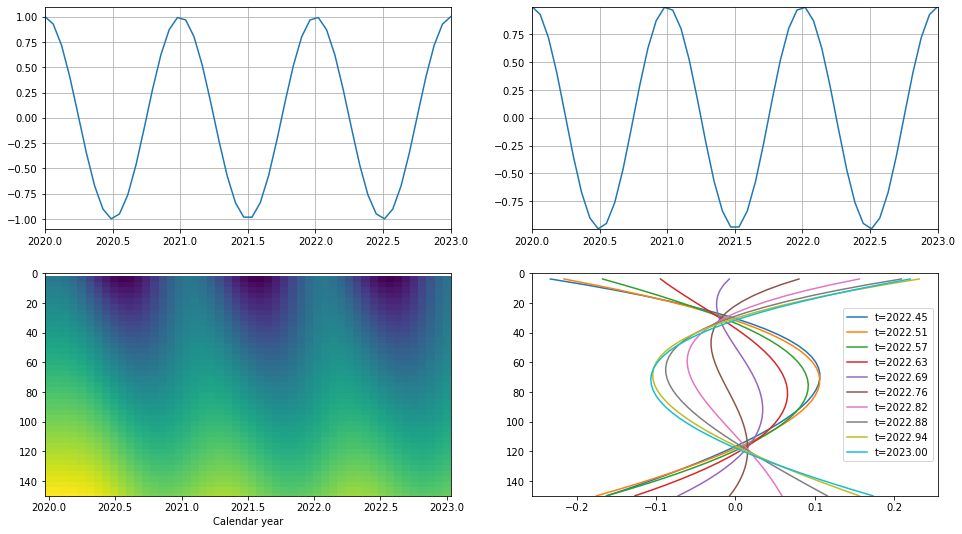

In [7]:

start_year = 2020
end_year = 2023
number_of_time_steps = 49
max_depth = 150

t = np.linspace(start_year,end_year, number_of_time_steps+1)

t_surf=np.cos(2*np.pi*t)
U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,nt=number_of_time_steps,zmax=max_depth)

make_plot(t,t_surf,start_year,end_year,z,U,plot_start_frac=0.8)

# Conclusions so far:
### 1. The signal only reflects temperature fluctuations in the last few years
### 2. A simple annual sinusoid does not capture the exact pattern

# Next steps:
### - Run with station met data
Nearest station is 75km at Elephant Moraine
http://amrc.ssec.wisc.edu/aws/index.php?region=All%20Stations&mode=international
